# ANALISIS DATA INFLASI INDONESIA

Jenis Analisa: deskriptif

Analisa data digunakan untuk meningkatkan kualitas data tersebut. 
Permasalahan yang biasanya mempengaruhi kualitas data diantaranya noisy, missing dan inconsistent data.
Tahap-tahap yang dilakukan pada analisa data adalah
 1. Data Understanding
 2. Data Preparation
 3. Hasil Analisa

## 1. Data Understanding

Data yang digunakan pada analisa kali ini adalah Data Inflasi Indonesia Tahun 2002-2019. 
Tahap ini dilakukan untuk memahami konten data dan permasalahan kualitas data.

### Deskripsi data

In [183]:
# import library
import pandas as pd
import numpy as np

In [184]:
# assign data kedalam variable data
datas = pd.read_csv('data-inflasi.csv');

In [185]:
# menampilkan lima data teratas
datas.head()

,Month,Inflasi
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%


In [186]:
# menampilkan ukuran dataset dalam format (jumlah data, jumlah atribut)
datas.shape

(199, 2)

In [187]:
# menampilkan tipe data dari masing-masing atribut
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
Month      199 non-null object
Inflasi    199 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


Berdasarkan deskripsi data di atas dapat kita lihat bahwa dataset ini
1. Memiliki dua atribut yaitu month dan inflasi, serta 199 instance. 
2. Tipe data dari kedua atribut tersebut berupa object.
3. Masing-masing atribut juga tidak memiliki missing value, keduanya berjumlah 199 instance.

## 2. Data Preparation 

Tipe data pada kolom inflasi harus diubah kedalam bentuk desimal agar dapat diolah

In [188]:
# Fix incorrectness data type
# mengubah format inflasi kedalam bentuk desimal
for i in range(len(datas.Inflasi)):
    datas.Inflasi[i] = datas.Inflasi[i][0:4]
    
datas.Inflasi = datas.Inflasi.astype(np.float64)

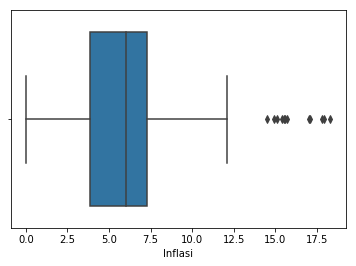

In [189]:
#  Identifikasi outlier
import seaborn as sns
sns.boxplot(datas.Inflasi)

In [190]:
# memisahkan tahun kedalam kolom baru
dataTahun = []
for i in range(len(datas)):
    dataTahun.append(datas.Month[i][-4:])
datas['Tahun'] = dataTahun

datas['Month'] = datas['Month'].map(lambda x: str(x)[:-5])
datas.tail()

,Month,Inflasi,Tahun
194,April,7.62,2003
195,Maret,7.17,2003
196,Februari,7.60,2003
197,Januari,8.68,2003
198,Desember,0.00,2002


In [191]:
# membuang instance 198 karena tidak memiliki nilai Inflasi
datas = datas.drop(198)
datas.tail()

,Month,Inflasi,Tahun
193,Mei,7.15,2003
194,April,7.62,2003
195,Maret,7.17,2003
196,Februari,7.60,2003
197,Januari,8.68,2003


## 3. Hasil Analisa

In [192]:
# perhitungan statistika dasar
datas.describe()

,Inflasi
count,198.000000
mean,6.342525
std,3.284255
min,2.410000
25%,3.887500
50%,6.050000
75%,7.297500
max,18.300000


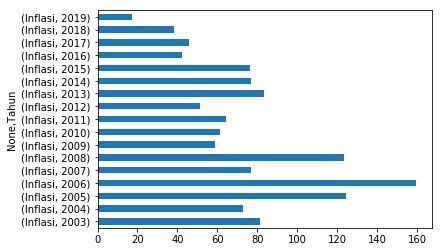

In [193]:
# pergerakan inflasi tahun 2019-2003
datas.groupby('Tahun').sum().unstack(0).plot.barh()

# Kesimpulan

1. Rata-rata nilai inflasi adalah 6.34%
2. Nilai inflasi paling rendah adalah 2.4%
3. Nilai inflasi paling tinggi adalah 18.3%
4. Inflasi tertinggi terjadi pada tahun 2005
5. Inflasi terendah terjadi pada tahun 2019
